In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim

# for image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

from pathlib import Path

from sklearn.metrics import classification_report

import monai

from monai.apps import download_and_extract
from monai.config import print_config
from monai.data import decollate_batch
from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121
from monai.transforms import (
    Activations,
    AddChannel,
    AsDiscrete,
    Compose,
    LoadImage,
    RandFlip,
    RandRotate,
    RandZoom,
    ScaleIntensity,
    EnsureType,
)
from monai.utils import set_determinism

## old class

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])#, transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
trainset = 'c:/Users/dorim/Desktop/python_study/test/tset_dataset.pt'

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
classes = ('normal', 'ubnormal')

In [ ]:
net = models.resnet18() # torchvision 에 이미 정의된 모델을 가져옵니다.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
print('\n===> Training Start')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)
if torch.cuda.device_count() > 1:
    print('\n===> Training on GPU!')
    net = nn.DataParallel(net)

In [ ]:
epochs = 2 # dataset을 여러번 사용해 트레이닝을 시킵니다.

for epoch in range(epochs):
    print('\n===> epoch %d' % epoch)
    running_loss = 0.0

    for data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / 2000))
        #     running_loss = 0.0

## new class

In [ ]:
import os

def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.png':
                    print(full_filename)
                    
    except PermissionError:
        pass


In [ ]:
dirname = 'C:/Users/dorim/desktop/python_study/new_patch/'

In [ ]:
search(dirname)

In [ ]:
count = 0

for (path, dir, files) in os.walk(dirname):
    for filename in files:
        ext = os.path.splitext(filename)[-1] # 확장자 분류
        if ext == '.png':
            count += 1
            print(f'{path}/{filename}')

In [ ]:
count = 0

for path, dir, files in os.walk(dirname):
    no_f, p = len(files), path
    print(p, no_f)
    count = count + no_f

print(count)


In [ ]:
def file_count(dirname):

    f = [] 
    count = 0

    for path, dir, files in os.walk(dirname):
        no_f, p = len(files), path
        #print(p, no_f)
        if no_f != 0:
            f.append(no_f)
            count = count + no_f
    
    return f, dir, count


In [ ]:
file_count(dirname)

([24,
  23,
  20,
  22,
  15,
  21,
  21,
  17,
  22,
  19,
  20,
  25,
  22,
  20,
  28,
  24,
  19,
  18,
  17,
  23,
  80,
  85,
  84,
  90,
  91,
  78,
  76,
  71,
  85,
  76,
  75,
  76,
  71,
  78,
  79,
  75,
  83,
  80,
  81,
  83],
 [],
 2017)

폴더 개수

In [ ]:
def folder_count(dirname):

    count = int(0)

    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            next_folders = os.listdir(full_filename)
            for next_folder in next_folders:
                foldername = os.path.join(full_filename, next_folder)
                count += 1
                print(foldername)
        
        #print(count)
        return int(count)
        
    
    except PermissionError:
        pass

In [ ]:
folder_count(dirname)

In [ ]:
f_num = folder_count(dirname)

f_num

In [ ]:
valid_rat = 0.1
test_rat = 0.1

In [ ]:
train_c = int(f_num * (1 - (valid_rat + test_rat)))
valid_c = int(f_num * valid_rat)
test_c = int(f_num * test_rat)

train_c, valid_c, test_c

In [ ]:
folder_no = random.sample(range(0, f_num),f_num)

In [ ]:
train_dir = folder_no[0:train_c]
valid_dir = folder_no[train_c:train_c+valid_c]
test_dir = folder_no[-test_c:]
 
train_dir, valid_dir, test_dir

In [ ]:
folder_list = []
return_list = []

hf_lists = os.listdir(dirname)

for hf_list in hf_lists:
    lf_list = os.path.join(dirname, hf_list)
    next_folders = os.listdir(lf_list)
    for next_folder in next_folders:
        folder_name = os.path.join(lf_list, next_folder)
        folder_list.append(folder_name)

for i in range(len(valid_dir)):
    return_list.append(folder_list[valid_dir[i]])

return_list


In [ ]:
def folder_search(dirname, case):
    
    folder_list = []
    return_list = []

    hf_lists = os.listdir(dirname)

    for hf_list in hf_lists:
        lf_list = os.path.join(dirname, hf_list)
        next_folders = os.listdir(lf_list)
        for next_folder in next_folders:
            folder_name = os.path.join(lf_list, next_folder)
            folder_list.append(folder_name)

    for i in range(len(case)):
        return_list.append(folder_list[valid_dir[i]])

    return return_list


In [ ]:
folder_search(dirname, valid_dir)

['C:/Users/dorim/desktop/python_study/new_patch/normal\\img12',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img09',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img13',
 'C:/Users/dorim/desktop/python_study/new_patch/cancer\\img02']

In [ ]:
test_folder = folder_search(dirname, valid_dir)[0]

test_folder

'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12'

In [ ]:
for path, dir, files in os.walk(test_folder):
    files

In [ ]:
def file_count(folder_name):

    file_list = []

    for path, dir, files in os.walk(folder_name):
        for file in files:
            file_list.append(path + "/" + file)
    
    return file_list

In [ ]:
file_count(folder_search(dirname, valid_dir)[0])

['C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12001_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12002_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12004_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12006_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12007_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12011_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12013_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12016_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12020_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12021_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12025_normal.png',
 'C:/Users/dorim/desktop/python_study/new_patch/normal

## something different

In [ ]:
def file_count(folder_name):
        
    file_list = []

    for path, dir, files in os.walk(folder_name):
        for file in files:
            file_list.append(path + "/" + file)
    
    return file_list


def file_split(dirname, type_dir):
            
    folder_list = []
    return_lists = []
    files = []

    hf_lists = os.listdir(dirname)

    for hf_list in hf_lists:
        lf_list = os.path.join(dirname, hf_list)
        next_folders = os.listdir(lf_list)
        for next_folder in next_folders:
            folder_name = os.path.join(lf_list, next_folder)
            folder_list.append(folder_name)

    for i in range(len(type_dir)):
        return_lists.append(folder_list[valid_dir[i]])
    
    for return_list in return_lists:
        files += file_count(return_list)

    return files


In [ ]:
len(file_split(dirname, valid_dir))

255

In [ ]:
file_split(dirname, valid_dir)[0]

'C:/Users/dorim/desktop/python_study/new_patch/normal\\img12/Image12001_normal.png'

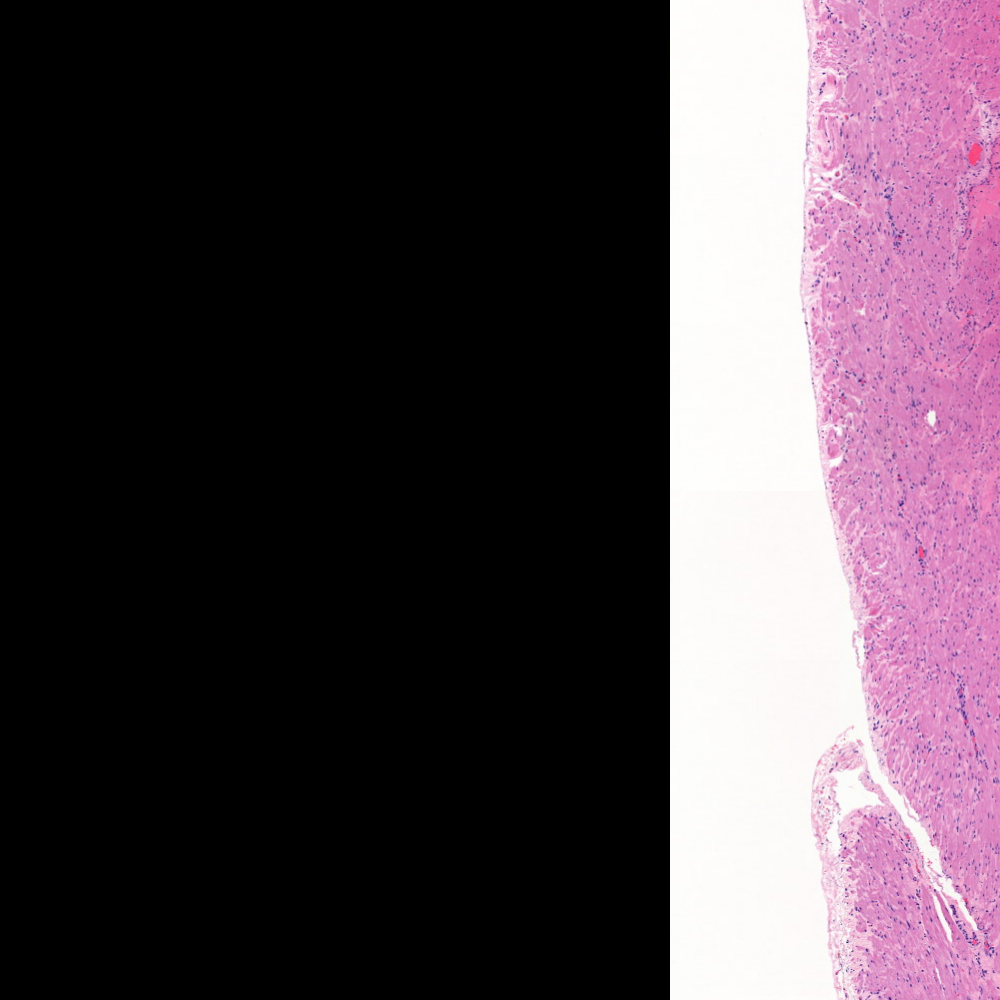

In [ ]:
from PIL import Image

img = Image.open(file_split(dirname, valid_dir)[0])

img

## classification start

In [ ]:
dirname = 'D:/python_study/new_patch/'

In [ ]:
def folder_count(dirname):
    
    count = int(0)

    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            next_folders = os.listdir(full_filename)
            for next_folder in next_folders:
                foldername = os.path.join(full_filename, next_folder)
                count += 1
                #print(foldername)
        
        #print(count)
        return int(count)
        
    
    except PermissionError:
        pass

In [ ]:
f_num = folder_count(dirname)

f_num

40

In [ ]:
valid_rat = 0.1
test_rat = 0.1

In [ ]:
train_c = int(f_num * (1 - (valid_rat + test_rat)))
valid_c = int(f_num * valid_rat)
test_c = int(f_num * test_rat)

train_c, valid_c, test_c

(32, 4, 4)

In [ ]:
folder_no = random.sample(range(0, f_num),f_num)

In [ ]:
train_dir = folder_no[0:train_c]
valid_dir = folder_no[train_c:train_c+valid_c]
test_dir = folder_no[-test_c:]

In [ ]:
def file_count(folder_name):
        
    file_list = []

    for path, dir, files in os.walk(folder_name):
        for file in files:
            file_list.append(path + "/" + file)
    
    return file_list

def file_split(dirname, type_dir):
            
    folder_list = []
    return_lists = []
    files = []
    label_list = []

    hf_lists = os.listdir(dirname)

    for hf_list in hf_lists:
        lf_list = os.path.join(dirname, hf_list)
        next_folders = os.listdir(lf_list)
        for next_folder in next_folders:
            folder_name = os.path.join(lf_list, next_folder)
            folder_list.append(folder_name)

    for i in range(len(type_dir)):
        return_lists.append(folder_list[type_dir[i]])
    
    for return_list in return_lists:
        files += file_count(return_list)

    for file in files:
        if 'cancer' in file:
            label_list.append(0)
        else:
            label_list.append(1)

    return files, label_list


In [ ]:
class_names = sorted(x for x in os.listdir(dirname)
                     if os.path.isdir(os.path.join(dirname, x)))

num_class = len(class_names)

In [ ]:
train_x, train_y = file_split(dirname, train_dir)

val_x, val_y = file_split(dirname, valid_dir)

test_x, test_y = file_split(dirname, test_dir)

In [ ]:
val_x, val_y

(['D:/python_study/new_patch/normal\\img19/Image19008_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19011_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19015_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19018_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19024_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19027_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19030_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19049_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19060_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19063_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19065_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19067_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19068_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19078_normal.png',
  'D:/python_study/new_patch/normal\\img19/Image19080_normal.p

In [ ]:
train_transforms = Compose(
    [
        LoadImage(image_only=True),
        # AddChannel(),
        ScaleIntensity(),
        RandRotate(range_x=np.pi / 12, prob=0.5, keep_size=True),
        RandFlip(spatial_axis=0, prob=0.5), 
        RandZoom(min_zoom=0.9, max_zoom=1.1, prob=0.5), 
        EnsureType(),
    ]
)

val_transforms = Compose(
    [LoadImage(image_only=True), ScaleIntensity(), EnsureType()])

y_pred_trans = Compose([EnsureType(), Activations(softmax=True)])
y_trans = Compose([EnsureType(), AsDiscrete(to_onehot=True, n_classes=num_class)])

In [ ]:
# 모델에 입력하기 위한 training, validation 또는 test 데이터셋 생성하기 위한 class선언
class MedNISTDataset(torch.utils.data.Dataset): #상속함 ()안에들어있는거
    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

# data_loader 정의(DataLoader = 데이터셋과 샘플러를 결합하고 사용 가능한 데이터셋을 제공합니다.)
# num_workers = 학습 도중 CPU의 작업을 몇 개의 코어를 사용해서 진행할지에 대한 설정 파라미터입니다
train_ds = MedNISTDataset(train_x, train_y, train_transforms)
train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=5, shuffle=True, num_workers=0)

val_ds = MedNISTDataset(val_x, val_y, val_transforms)
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=5, num_workers=0)

test_ds = MedNISTDataset(test_x, test_y, val_transforms)
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=5, num_workers=0)

In [ ]:
a,b = train_ds[0]

a, b

(tensor([[[0.9700, 0.9700, 0.9700, 1.0000],
          [0.9720, 0.9720, 0.9720, 1.0000],
          [0.9720, 0.9720, 0.9720, 1.0000],
          ...,
          [0.3960, 0.2280, 0.5940, 1.0000],
          [0.4080, 0.2260, 0.5960, 1.0000],
          [0.4360, 0.2440, 0.6060, 1.0000]],
 
         [[0.9720, 0.9720, 0.9720, 1.0000],
          [0.9720, 0.9720, 0.9720, 1.0000],
          [0.9720, 0.9720, 0.9720, 1.0000],
          ...,
          [0.5120, 0.3160, 0.6520, 1.0000],
          [0.5120, 0.3120, 0.6380, 1.0000],
          [0.5040, 0.3020, 0.6360, 1.0000]],
 
         [[0.9700, 0.9700, 0.9700, 1.0000],
          [0.9680, 0.9680, 0.9680, 1.0000],
          [0.9680, 0.9680, 0.9680, 1.0000],
          ...,
          [0.6660, 0.4340, 0.7340, 1.0000],
          [0.6700, 0.4480, 0.7380, 1.0000],
          [0.6340, 0.4240, 0.7180, 1.0000]],
 
         ...,
 
         [[0.9600, 0.9600, 0.9520, 1.0000],
          [0.9600, 0.9600, 0.9520, 1.0000],
          [0.9600, 0.9600, 0.9520, 1.0000],
      

In [ ]:
device = torch.device("cuda:0") # 저장한 모델을 gpu에서 불러올 때
model = DenseNet121(spatial_dims=2, in_channels=4, #DenseNet은 CNN 아키텍쳐 중 하나
                    out_channels=num_class).to(device) # out_channels = 출력 채널 수
loss_function = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), 1e-5) # learning rate
max_epochs = 3 
val_interval = 1
auc_metric = ROCAUCMetric() # AUC: ROC 곡선 아래 영역 / AUC 계산 metric

In [ ]:
#epoch =4
#batchsize =5

best_metric = -1    
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []

for epoch in range(max_epochs): 
    print("-" * 10)         #구분선
    print(f"epoch {epoch + 1}/{max_epochs}") #몇번째 epoch인지 출력
    model.train()           # 모델 학습
    epoch_loss = 0          # epoch_loss(epoch의 average loss) 초기화
    step = 0                # step 초기화
    for batch_data in train_loader: # train_loader에서 train데이터에 대한 정보가져옴
        step += 1
        inputs, labels = batch_data[0].permute(0,3,1,2).to(device), batch_data[1].to(device)
        optimizer.zero_grad() #Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야합니다
        outputs = model(inputs)
        loss = loss_function(outputs, labels) #lossfuction으로 loss 계산
        loss.backward() #현재 tensor의 gradient를 계산
        optimizer.step() #
        epoch_loss += loss.item() #train_loss 값을 epoch_loss에 더해서 저장
        print(
            f"{step}/{len(train_ds) // train_loader.batch_size}, "# train데이터를 batch size로 나눈 값
            f"train_loss: {loss.item():.4f}") # train loss
        epoch_len = len(train_ds) // train_loader.batch_size #epoch수 (47164 /300)
    epoch_loss /= step        # average loss는 전체 loss 값 더해준 것을 step으로 나눈 값
    epoch_loss_values.append(epoch_loss)  # epoch_loss값 리스트에 원소로 추가
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0: # epoch 한 번 돌았으면 나머지 수행
        model.eval()   # 모델 평가
        with torch.no_grad():    #gradinet 계산하지 않음
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in val_loader:
                val_images, val_labels = (
                    val_data[0].permute(0,3,1,2).to(device),
                    val_data[1].to(device),
                )
                y_pred = torch.cat([y_pred, model(val_images)], dim=0)
                y = torch.cat([y, val_labels], dim=0)
            y_onehot = [y_trans(i) for i in decollate_batch(y)]
            y_pred_act = [y_pred_trans(i) for i in decollate_batch(y_pred)]
            auc_metric(y_pred_act, y_onehot)
            result = auc_metric.aggregate() #auc metric을 통해 auc 계산하고 result에 저장
            auc_metric.reset() #버퍼를 리셋한다
            del y_pred_act, y_onehot #del은 파이썬 어레이의 요소를 삭제
            metric_values.append(result) #auc값 list에 추가
            acc_value = torch.eq(y_pred.argmax(dim=1), y)
            acc_metric = acc_value.sum().item() / len(acc_value)
            if result > best_metric:  #best_metric보다 auc크다면 result로 best_metric값 업데이트
                best_metric = result  #
                best_metric_epoch = epoch + 1 
                torch.save(model.state_dict(), os.path.join(  #root_dir에 모델의 weight를 저장
                    dirname, "best_metric_model.pth"))
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} current AUC: {result:.4f}"
                f" current accuracy: {acc_metric:.4f}"
                f" best AUC: {best_metric:.4f}"
                f" at epoch: {best_metric_epoch}"
            )

print(
    f"train completed, best_metric: {best_metric:.4f} "
    f"at epoch: {best_metric_epoch}")

----------
epoch 1/3
1/2072, train_loss: 0.6592
2/2072, train_loss: 0.4364
3/2072, train_loss: 0.6609
4/2072, train_loss: 0.4599
5/2072, train_loss: 0.6410
6/2072, train_loss: 0.6921
7/2072, train_loss: 0.5349
8/2072, train_loss: 0.6465
9/2072, train_loss: 0.5759
10/2072, train_loss: 0.5510
11/2072, train_loss: 0.5159
12/2072, train_loss: 0.4133
13/2072, train_loss: 0.5373
14/2072, train_loss: 0.5628
15/2072, train_loss: 0.4958
16/2072, train_loss: 0.4261
17/2072, train_loss: 0.4184
18/2072, train_loss: 0.4925
19/2072, train_loss: 0.6214
20/2072, train_loss: 0.4852
21/2072, train_loss: 0.5331
22/2072, train_loss: 0.4065
23/2072, train_loss: 0.4085
24/2072, train_loss: 0.5095
25/2072, train_loss: 0.6252
26/2072, train_loss: 0.4050
27/2072, train_loss: 0.4007
28/2072, train_loss: 0.5206
29/2072, train_loss: 0.7808
30/2072, train_loss: 0.5445
31/2072, train_loss: 0.5480
32/2072, train_loss: 0.5646
33/2072, train_loss: 0.6731
34/2072, train_loss: 0.5014
35/2072, train_loss: 0.3874
36/2072,

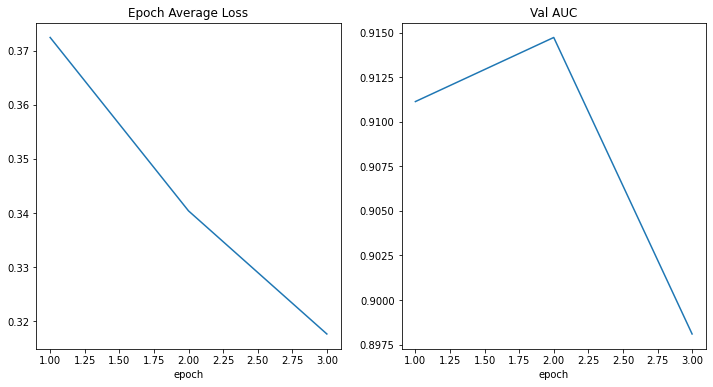

In [ ]:
plt.figure("train", (12, 6)) #
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))] #0부터 eppch_loss가 계산된 횟수까지 리스트에 저장
y = epoch_loss_values #epoch_loss값
plt.xlabel("epoch") #축은 epoch
plt.plot(x, y) 
plt.subplot(1, 2, 2)
plt.title("Val AUC")
x = [val_interval * (i + 1) for i in range(len(metric_values))] #0에서 epoch수까지 1을 더해서 가져와서 validation interval과 곱함
y = metric_values #epoch별 AUC값
plt.xlabel("epoch") #축은 epoch
plt.plot(x, y)
plt.show()

In [ ]:
model.load_state_dict(torch.load(
    os.path.join(dirname, "best_metric_model.pth")))
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for test_data in test_loader:
        test_images, test_labels = (  #test_image와 test_label을 가져옴
            test_data[0].permute(0, 3, 1, 2).to(device),
            test_data[1].to(device),
        )
        pred = model(test_images).argmax(dim=1) #차원에서 텐서의 최대값 인덱스를 반환합니다.
        for i in range(len(pred)):
            y_true.append(test_labels[i].item()) # 정답들을 저장
            y_pred.append(pred[i].item())        # 모델이 예측한 값들을 저장

In [ ]:
print(classification_report(
    y_true, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

      cancer     0.7078    0.7045    0.7062       220
      normal     0.9250    0.9261    0.9256       866

    accuracy                         0.8812      1086
   macro avg     0.8164    0.8153    0.8159      1086
weighted avg     0.8810    0.8812    0.8811      1086

